In [205]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
from scipy.stats import pointbiserialr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro





import openpyxl
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd



# Read the CSV file
df = pd.read_csv('Student_performance_data.csv')

# Verify the dataframe
print(df)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

In [206]:
# Drop duplicates if they exist
df = df.drop_duplicates()

In [207]:
# Check if there are columns with null values
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [208]:
# Check the data types
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [209]:
# Modify the data types
df['GradeClass'] = df['GradeClass'].astype(int)

In [210]:
# Filter the rows where Age is not between 15 and 18
df_invalid = df[~((df['Age'] >= 15) & (df['Age'] <= 18))]

print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [211]:
# Filter the rows where Gender is not 0 or 1
df_invalid = df[~df['Gender'].isin([0, 1])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [212]:
# Filter the rows where Ethnicity is not 0, 1, 2 or 3
df_invalidos = df[~df['Ethnicity'].isin([0, 1, 2, 3])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [213]:
# Filter the rows where StudyTimeWeekly is not between 0 and 20
df_invalid = df[~((df['StudyTimeWeekly'] >= 0) & (df['StudyTimeWeekly'] <= 20))]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [214]:
# Filter the rows where ParentalEducation is not 0, 1, 2, 3 or 4
df_invalid = df[~df['ParentalEducation'].isin([0, 1, 2, 3, 4])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [215]:
# Filter the rows where Absences is not between 0 and 30
df_invalid = df[~((df['Absences'] >= 0) & (df['Absences'] <= 30))]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [216]:
# Filter the rows where Tutoring is not 0 or 1
df_invalid = df[~df['Tutoring'].isin([0, 1])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [217]:
# Filter the rows where ParentalSupport is not 0, 1, 2, 3 or 4
df_invalid = df[~df['ParentalSupport'].isin([0, 1, 2, 3, 4])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [218]:
# Filter the rows where Extracurricular is not 0 or 1
df_invalid = df[~df['Extracurricular'].isin([0, 1])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [219]:
# Filter the rows where Sports is not 0 or 1
df_invalid = df[~df['Sports'].isin([0, 1])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [220]:
# Filter the rows where Music is not 0 or 1
df_invalid = df[~df['Music'].isin([0, 1])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [221]:
# Filter the rows where Volunteering is not 0 or 1
df_invalid = df[~df['Volunteering'].isin([0, 1])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [222]:
# Filter the rows where GPA is not between 0 and 4
df_invalid = df[~((df['GPA'] >= 0) & (df['GPA'] <= 4))]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [223]:
# Filter the rows where GradeClass is not 0, 1 , 2 or 3
df_invalid = df[~df['GradeClass'].isin([0, 1, 2, 3, 4])]
print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [224]:
# Check the GradeClass conditions based on GPA
invalid_conditions = (
    ((df['GradeClass'] == '0') & (df['GPA'] < 3.5)) |
    ((df['GradeClass'] == '1') & ((df['GPA'] < 3.0) | (df['GPA'] >= 3.5))) |
    ((df['GradeClass'] == '2') & ((df['GPA'] < 2.5) | (df['GPA'] >= 3.0))) |
    ((df['GradeClass'] == '3') & ((df['GPA'] < 2.0) | (df['GPA'] >= 2.5))) |
    ((df['GradeClass'] == '4') & (df['GPA'] >= 2.0))    
)

# Filter the rows that don't meet the conditions
df_invalid = df[invalid_conditions]

print(df_invalid)

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [225]:
df_corrected = df_invalid.copy()  

# Correct GradeClass
df_corrected.loc[df['GPA'] >= 3.5, 'GradeClass'] = '0'  # If GPA >= 3.5, GradeClass = 0
df_corrected.loc[(df['GPA'] >= 3.0) & (df['GPA'] < 3.5), 'GradeClass'] = '1'  # If 3.0 <= GPA < 3.5, GradeClass = 1
df_corrected.loc[(df['GPA'] >= 2.5) & (df['GPA'] < 3.0), 'GradeClass'] = '2'  # If 2.5 <= GPA < 3.0, GradeClass = 2
df_corrected.loc[(df['GPA'] >= 2.0) & (df['GPA'] < 2.5), 'GradeClass'] = '3'  # If 2.0 <= GPA < 2.5, GradeClass = 3
df_corrected.loc[df['GPA'] < 2.0, 'GradeClass'] = '4'  # If GPA < 2.0, GradeClass = 4

print(df_corrected)


Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [226]:
# Replace incorrect values with the correct ones
df.update(df_corrected, overwrite=True)
print(df)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracur

In [227]:
# Map from numbers to categories 
label_map = {0: 'Male', 1: 'Female'}
df['GenderClass'] = df['Gender'].map(label_map)

label_map = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
df['EthnicityClass'] = df['Ethnicity'].map(label_map)

label_mp = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
df['ParentalSupportClass'] = df['ParentalSupport'].map(label_mp)

label_map = {0: 'None', 1: 'Highschool', 2: 'Some college', 3: 'Bachelor´s', 4: 'Higher'}
df['ParentalEducationClass'] = df['ParentalEducation'].map(label_map)

label_map = {0: 'No', 1: 'Yes'}
df['TutoringClass'] = df['Tutoring'].map(label_map)

label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F'}
df['GradeClassClass'] = df['GradeClass'].map(label_map)

df.rename(columns={'Extracurricular': 'OtherActivity'}, inplace=True)


print(df)


      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  OtherAct

In [228]:
df['None'] = np.where((df[['OtherActivity', 'Music', 'Sports', 'Volunteering']].sum(axis=1) == 0), 1, 0)



## Create a new dataframe for activities


# Count the number of 0s and 1s for each category
categories = ['None', 'Volunteering', 'Music', 'Sports', 'OtherActivity']
yes_counts = {category: (df[category] == 1).sum() for category in categories}
no_counts = {category: (df[category] == 0).sum() for category in categories}

# Create the new DataFrame
summary_df = pd.DataFrame({
    'Valor': categories,
    'Yes': [yes_counts[cat] for cat in categories],
    'No': [no_counts[cat] for cat in categories]
})

print(summary_df)

           Valor  Yes    No
0           None  679  1713
1   Volunteering  376  2016
2          Music  471  1921
3         Sports  726  1666
4  OtherActivity  917  1475


In [229]:
def calculate_scott_interval_size(df, column_name, integer =False):
   
    column = df[column_name]
    
    standard_deviation = np.std(column)
    
    # Number of elements in the column
    n = len(column)
    
    # Scott Rule
    bin_width = (3.5 * standard_deviation) / (n ** (1 / 3))
        
    return round(bin_width) if integer else bin_width

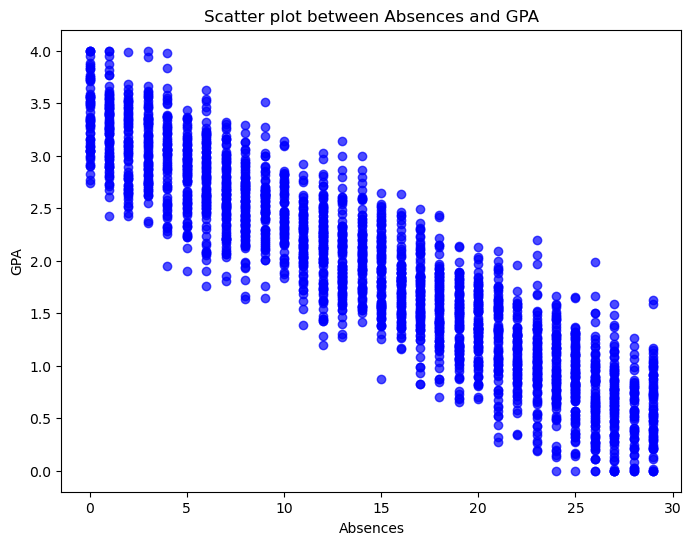

In [230]:
# Scatter plot between Absences and GPA
plt.figure(figsize=(8, 6))
plt.scatter(df['Absences'], df['GPA'], color='blue', alpha=0.7)
plt.title('Scatter plot between Absences and GPA')
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.show()

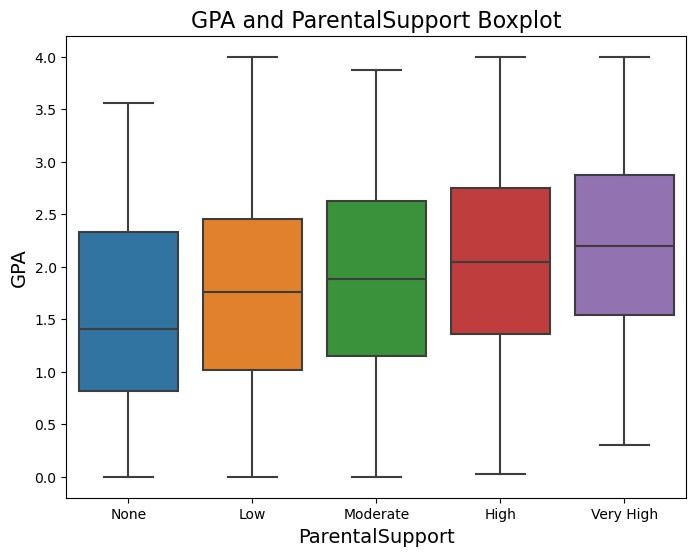

In [231]:
# Boxplot between GPA and ParentalSupport

# Specify the category's order
order = ['None', 'Low', 'Moderate', 'High', 'Very High']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ParentalSupportClass', y='GPA', data=df, order=order)
plt.title('GPA and ParentalSupport Boxplot', fontsize=16)
plt.xlabel('ParentalSupport', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.show()

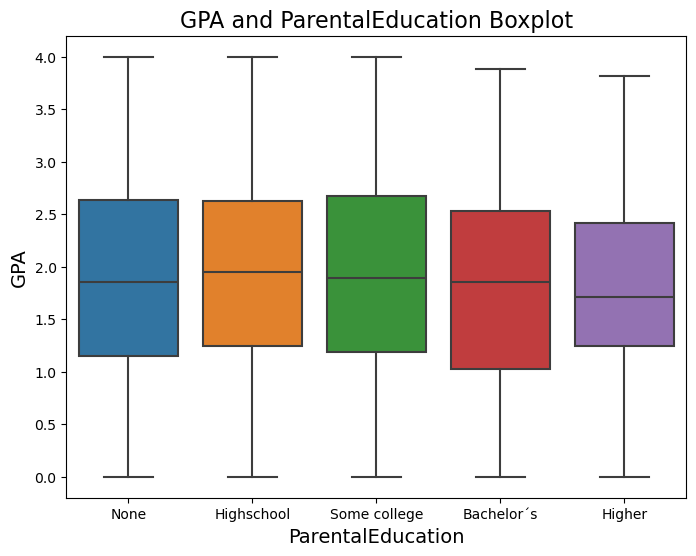

In [232]:
# Boxplot between GPA and ParentalEducation
# Specify the category's order
order = ['None', 'Highschool', 'Some college', 'Bachelor´s', 'Higher']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ParentalEducationClass', y='GPA', data=df, order=order)
plt.title('GPA and ParentalEducation Boxplot', fontsize=16)
plt.xlabel('ParentalEducation', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.show()

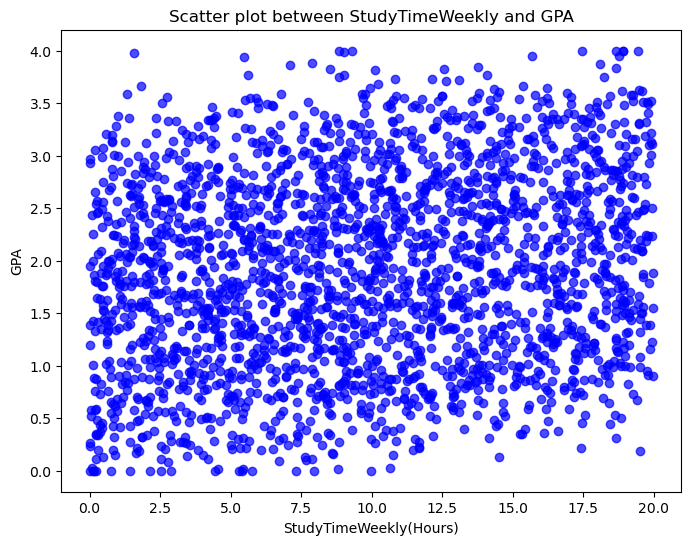

In [233]:
# Scatter Plot Betweeen GPA and StudyTimeWeeklky

plt.figure(figsize=(8, 6))
plt.scatter(df['StudyTimeWeekly'], df['GPA'], color='blue', alpha=0.7)
plt.title('Scatter plot between StudyTimeWeekly and GPA')
plt.xlabel('StudyTimeWeekly(Hours)')
plt.ylabel('GPA')

plt.show()

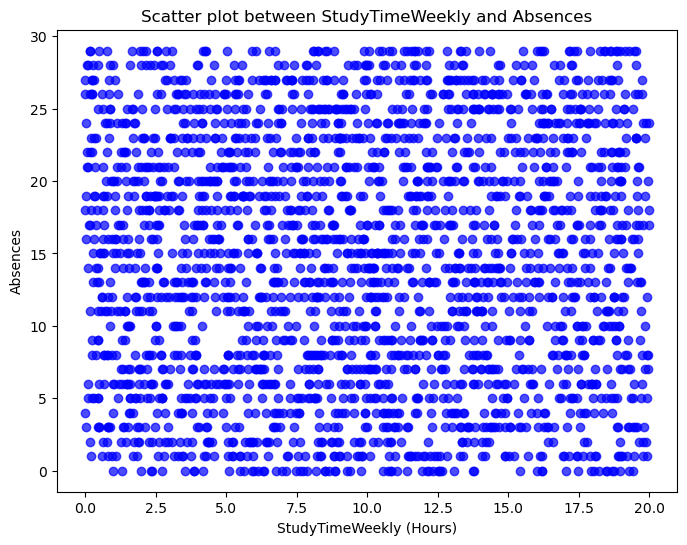

In [234]:
# Scatter Plot Betweeen Absences and StudyTimeWeeklky

plt.figure(figsize=(8, 6))
plt.scatter(df['StudyTimeWeekly'], df['Absences'], color='blue', alpha=0.7)
plt.title('Scatter plot between StudyTimeWeekly and Absences')
plt.xlabel('StudyTimeWeekly (Hours)')
plt.ylabel('Absences')

plt.show()

In [235]:
# Pearson Coefficient Between StudyTimeWeekly and GPA
correlation = df['GPA'].corr(df['StudyTimeWeekly'])
print(correlation)

0.17927512685608818


In [236]:
# Pearson Coefficient Between StudyTimeWeekly and Absences
correlation = df['Absences'].corr(df['StudyTimeWeekly'])
print(correlation)

0.009325534802771129


In [237]:
#Spearman Coefficient between GPA and ParentalSupport
correlation = spearmanr(df['Absences'], df['ParentalSupport'])

print(correlation)

SignificanceResult(statistic=0.002922971159804439, pvalue=0.8863829953890192)


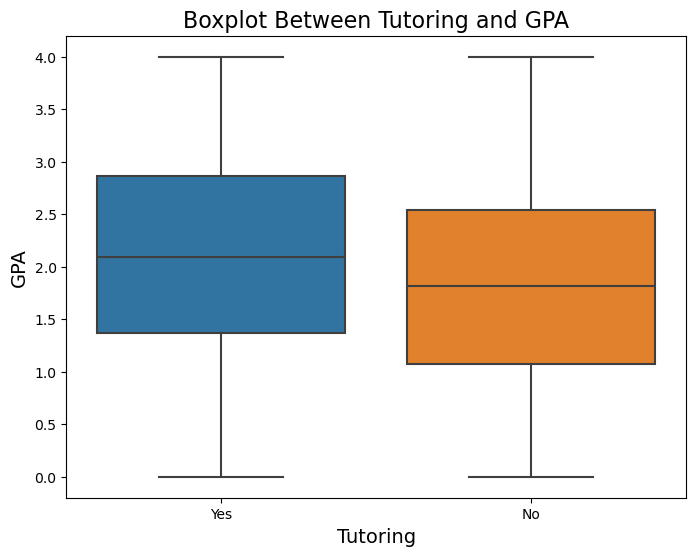

In [238]:
# Map from numbers to categories
label_map = {0: 'No', 1: 'Yes'}
df['TutoringClass'] = df['Tutoring'].map(label_map)


# Boxplot bewteen Tutoring and GPA
plt.figure(figsize=(8, 6))
sns.boxplot(x='TutoringClass', y='GPA', data=df)
plt.title('Boxplot Between Tutoring and GPA', fontsize=16)
plt.xlabel('Tutoring', fontsize=14)
plt.ylabel('GPA', fontsize=14)

plt.show()

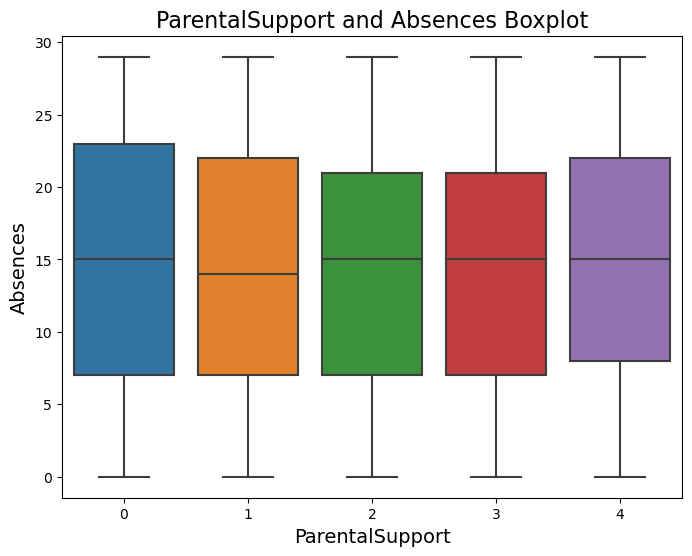

In [239]:
# Boxplot between Absences and ParentalSupport

plt.figure(figsize=(8, 6))
sns.boxplot(x='ParentalSupport', y='Absences', data=df)

plt.title('ParentalSupport and Absences Boxplot', fontsize=16)
plt.xlabel('ParentalSupport', fontsize=14)
plt.ylabel('Absences', fontsize=14)

# Mostrar el gráfico
plt.show()

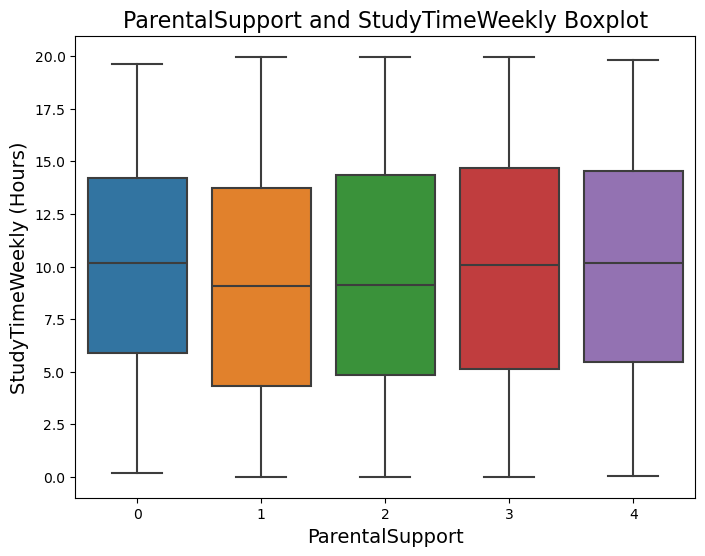

In [240]:
# Boxplot between StudyTimeWeekly and ParentalSupport
plt.figure(figsize=(8, 6))
sns.boxplot(x='ParentalSupport', y='StudyTimeWeekly', data=df)

plt.title('ParentalSupport and StudyTimeWeekly Boxplot', fontsize=16)
plt.xlabel('ParentalSupport', fontsize=14)
plt.ylabel('StudyTimeWeekly (Hours)', fontsize=14)

plt.show()

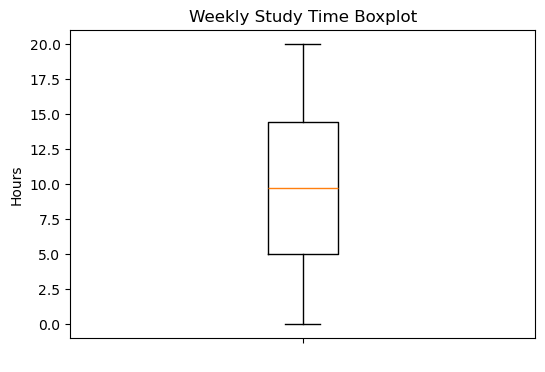

In [241]:
# WeeklyStudyTime Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['StudyTimeWeekly'])
plt.title('Weekly Study Time Boxplot')
plt.ylabel('Hours')
plt.xticks([1], [' '])
plt.show()

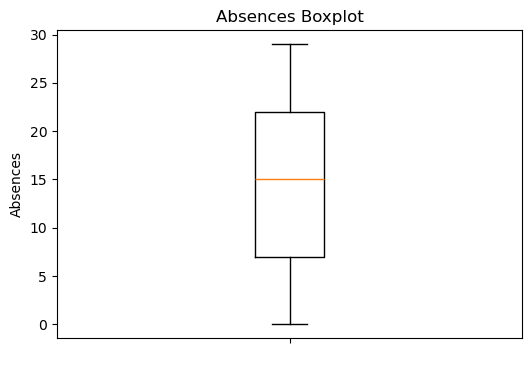

In [242]:
# Absences Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['Absences'])
plt.title('Absences Boxplot')
plt.ylabel('Absences')
plt.xticks([1], [' '])
plt.show()

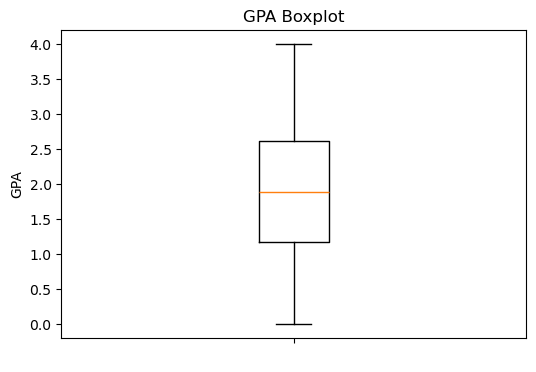

In [243]:
# Absences Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['GPA'])
plt.title('GPA Boxplot')
plt.ylabel('GPA')
plt.xticks([1], [' '])
plt.show()

In [244]:
# Create Range Column for Absences, GPA and StudyTimeWeekly
# Función para asignar el intervalo basado en Absences
def assign_interval_absences(value):
    if 0 <= value < 2:
        return "A. [0 : 2)"
    elif 2 <= value < 4:
        return "B. [2 : 4)"
    elif 4 <= value < 6:
        return "C. [4 : 6)"
    elif 6 <= value < 8:
        return "D. [6 : 8)"
    elif 8 <= value < 10:
        return "E. [8 : 10)"
    elif 10 <= value < 12:
        return "F. [10 : 12)"
    elif 12 <= value < 14:
        return "G. [12 : 14)"
    elif 14 <= value < 16:
        return "H. [14 : 16)"
    elif 16 <= value < 18:
        return "I. [16 : 18)"
    elif 18 <= value < 20:
        return "J. [18 : 20)"
    elif 20 <= value < 22:
        return "K. [20 : 22)"
    elif 22 <= value < 24:
        return "L. [22 : 24)"
    elif 24 <= value < 26:
        return "M. [24 : 26)"
    elif 26 <= value < 28:
        return "N. [26 : 28)"
    elif 28 <= value < 30:
        return "O. [28 : 30]"

# Crear una nueva columna con los intervalos
df['AbsencesInterval'] = df['Absences'].apply(assign_interval_absences)



# Función para asignar el intervalo basado en GPA
def assign_interval_GPA(value):
    if 0 <= value < 0.24:
        return "A. [0.00 : 0.24)"
    elif 0.24 <= value < 0.48:
        return "B. [0.24 : 0.48)"
    elif 0.48 <= value < 0.72:
        return "C. [0.48 : 0.72)"
    elif 0.72 <= value < 0.96:
        return "D. [0.72 : 0.96)"
    elif 0.96 <= value < 1.20:
        return "E. [0.96 : 1.20)"
    elif 1.20 <= value < 1.44:
        return "F. [1.20 : 1.44)"
    elif 1.44 <= value < 1.68:
        return "G. [1.44 : 1.68)"
    elif 1.68 <= value < 1.92:
        return "H. [1.68 : 1.92)"
    elif 1.92 <= value < 2.16:
        return "I. [1.92 : 2.16)"
    elif 2.16 <= value < 2.40:
        return "J. [2.16 : 2.40)"
    elif 2.40 <= value < 2.64:
        return "K. [2.40 : 2.64)"
    elif 2.64 <= value < 2.88:
        return "L. [2.64 : 2.88)"
    elif 2.88 <= value < 3.12:
        return "M. [2.88 : 3.12)"
    elif 3.12 <= value < 3.36:
        return "N. [3.12 : 3.36)"
    elif 3.36 <= value < 3.60:
        return "O. [3.36 : 3.60)"
    elif 3.60 <= value < 3.84:
        return "P. [3.60 : 3.84)"
    elif 3.84 <= value <= 4.00:
        return "Q. [3.84 : 4.00]"

# Crear una nueva columna con los intervalos
df['GPA Interval'] = df['GPA'].apply(assign_interval_GPA)

# Mostrar el DataFrame con la nueva columna
print(df)


# Función para asignar el intervalo basado en StudyTimeWeekly
def assign_study_time_interval(value):
    if 0 <= value < 1.5:
        return "A. [0.00 : 1.50)"
    elif 1.5 <= value < 3.0:
        return "B. [1.50 : 3.00)"
    elif 3.0 <= value < 4.5:
        return "C. [3.00 : 4.50)"
    elif 4.5 <= value < 6.0:
        return "D. [4.50 : 6.00)"
    elif 6.0 <= value < 7.5:
        return "E. [6.00 : 7.50)"
    elif 7.5 <= value < 9.0:
        return "F. [7.50 : 9.00)"
    elif 9.0 <= value < 10.5:
        return "G. [9.00 : 10.50)"
    elif 10.5 <= value < 12.0:
        return "H. [10.50 : 12.00)"
    elif 12.0 <= value < 13.5:
        return "I. [12.00 : 13.50)"
    elif 13.5 <= value < 15.0:
        return "J. [13.50 : 15.00)"
    elif 15.0 <= value < 16.5:
        return "K. [15.00 : 16.50)"
    elif 16.5 <= value < 18.0:
        return "L. [16.50 : 18.00)"
    elif 18.0 <= value < 19.5:
        return "M. [18.00 : 19.50)"
    elif 19.5 <= value <= 20.0:
        return "N. [19.50 : 20.00]"
    
# Crear una nueva columna con los intervalos de StudyTimeWeekly
df['StudyTimeWeeklyInterval'] = df['StudyTimeWeekly'].apply(assign_study_time_interval)

# Mostrar el DataFrame con la nueva columna
print(df)


      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  OtherAct

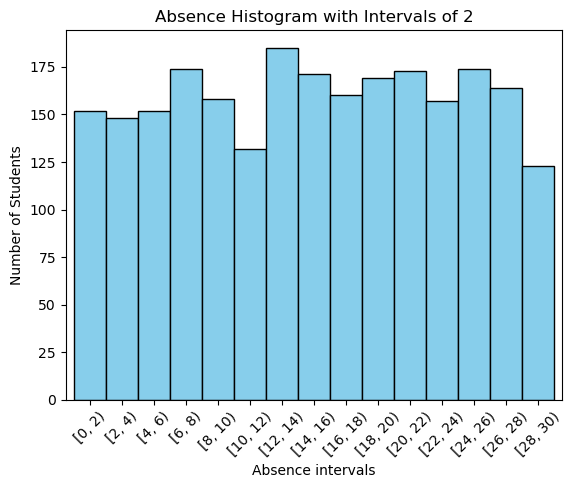

In [245]:
# Histogram of Absences

interval_size = calculate_scott_interval_size(df, 'Absences', True)
start = 0
end = 30

# Generate bins using np.arange
bins = np.arange(start, end + interval_size, interval_size)

# Create the histogram
df['group'] = pd.cut(df['Absences'], bins=bins, right=False)  # right=False to exclude the upper limit
histogram = df['group'].value_counts().sort_index()

# Show the histogram
histogram.plot(kind='bar', color='skyblue', edgecolor='black', width=0.99)
plt.xlabel('Absence intervals')
plt.ylabel('Number of Students')
plt.title(f'Absence Histogram with Intervals of {interval_size}')
plt.xticks(rotation=45)
plt.show()



1.4790578484449992


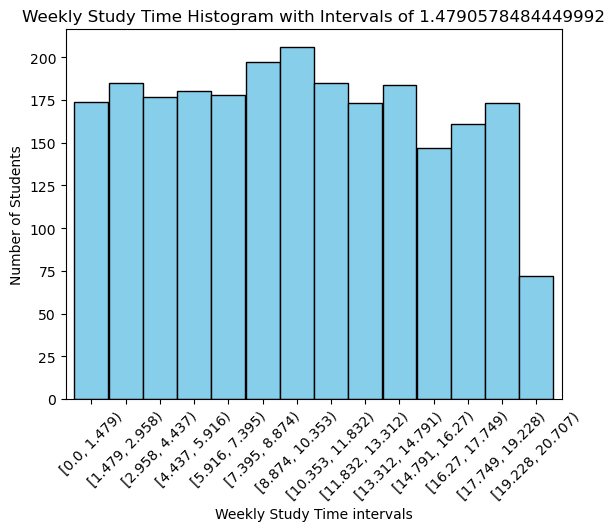

In [246]:
# Histogram of weekly Study Time

start = 0
end = 19.98
interval_size = calculate_scott_interval_size(df, 'StudyTimeWeekly')
print(interval_size)

# Generate bins using np.arange
bins = np.arange(start, end + interval_size, interval_size)

# Create the histogram
df['group'] = pd.cut(df['StudyTimeWeekly'], bins=bins, right=False)  # right=False to exclude the upper limit
histogram = df['group'].value_counts().sort_index()

# Show the histogram
histogram.plot(kind='bar', color='skyblue', edgecolor='black', width=0.99)
plt.xlabel('Weekly Study Time intervals')
plt.ylabel('Number of Students')
plt.title(f'Weekly Study Time Histogram with Intervals of {interval_size}')
plt.xticks(rotation=45)
plt.show()

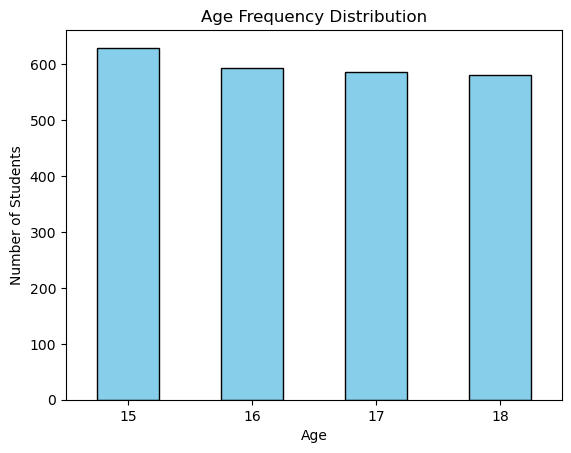

In [247]:


# Contamos la frecuencia de cada edad en el rango 15-18
age_counts = df['Age'].value_counts().sort_index()

# Mostrar el histograma
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Age Frequency Distribution')
plt.xticks(rotation=0)
plt.show()

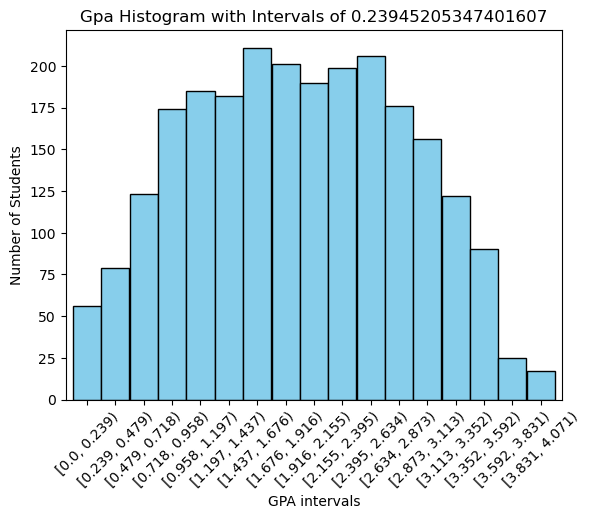

In [248]:
start = 0
end = 4
interval_size = calculate_scott_interval_size(df, 'GPA')

# Generate the bins 
bins = np.arange(start, end + interval_size, interval_size)

# Create the histogram
df['group'] = pd.cut(df['GPA'], bins=bins, right=False)  # right=False to exclude the upper limit
histogram = df['group'].value_counts().sort_index()

# Show the histogram
histogram.plot(kind='bar', color='skyblue', edgecolor='black', width=0.99)
plt.xlabel('GPA intervals')
plt.ylabel('Number of Students')
plt.title(f'Gpa Histogram with Intervals of {interval_size}')
plt.xticks(rotation=45)
plt.show()

In [249]:
# calculate the absences distribution's skewness 
skewness = skew(df['Absences'])
print(skewness)

-0.02600077249756051


In [250]:
# calculate the studyTimeWeekly distribution's skewness 
skewness = skew(df['StudyTimeWeekly'])
print(skewness)

0.050036669884928095


In [251]:
# calculate the GPA distribution's skewness 
skewness = skew(df['GPA'])
print(skewness)

0.014516490896101894


In [252]:
# calculate the Absences distribution' kurtosis

kurt = kurtosis(df['Absences'])

print(kurt)

-1.1762755655561952


In [253]:
# calculate the StudyTimeWeekly distribution' kurtosis

kurt = kurtosis(df['StudyTimeWeekly'])

print(kurt)

-1.1358169615994715


In [254]:
# calculate the GPA distribution' kurtosis

kurt = kurtosis(df['GPA'])

print(kurt)

-0.8639807768499352


In [255]:
#Spearman Coefficient between StudyTimeWeekly and GPA
correlation = spearmanr(df['StudyTimeWeekly'], df['GPA'])
print(correlation)

SignificanceResult(statistic=0.16908213802512376, pvalue=8.420971033451498e-17)


In [256]:
#Spearman Coefficient between Absences and GPA
correlation = spearmanr(df['Absences'], df['GPA'])
print(correlation)

SignificanceResult(statistic=-0.9254668628460838, pvalue=0.0)


In [257]:
#Spearman Coefficient between GPA and ParentalSupport
correlation = spearmanr(df['GPA'], df['ParentalSupport'])

print(correlation)

SignificanceResult(statistic=0.17600019069933626, pvalue=4.279655783946196e-18)


In [258]:
#Spearman Coefficient between StudyTimeWeekly and ParentalSupport
correlation = spearmanr(df['StudyTimeWeekly'], df['ParentalSupport'])
print(correlation)

SignificanceResult(statistic=0.03892543693081844, pvalue=0.056976044192283054)


In [259]:
# Pearson Coefficient Between ParentalSupport and GPA
df['ParentalSupport'] = pd.to_numeric(df['ParentalSupport'], errors='coerce')
correlation = df['GPA'].corr(df['ParentalSupport'])
print(correlation)

0.19077372781932905


In [276]:
# Pearson Coefficient Between Gender and GPA
correlation = df['GPA'].corr(df['Gender'])
print(correlation)

-0.013359974928969435


In [280]:
# Pearson Coefficient Between Tutoring and GPA
df['ParentalSupport'] = pd.to_numeric(df['ParentalSupport'], errors='coerce')
correlation = df['GPA'].corr(df['Tutoring'])
print(correlation)

0.14511891996780368


In [281]:
# Pearson Coefficient Between Ethnicity and GPA
correlation = df['GPA'].corr(df['Ethnicity'])
print(correlation)

0.02775958377788628


In [282]:
# Pearson Coefficient Between GPA and Age
correlation = df['GPA'].corr(df['Age'])
print(correlation)

0.0002753881983358555


In [283]:
# Pearson Coefficient Between Sports and GPA
correlation = df['GPA'].corr(df['Sports'])
print(correlation)

0.05785908706746861


In [284]:
# Pearson Coefficient Between Music and GPA
correlation = df['GPA'].corr(df['Music'])
print(correlation)

0.07331799243401459


In [285]:
# Pearson Coefficient Between Music and GPA
correlation = df['GPA'].corr(df['Volunteering'])
print(correlation)

0.003257914066667164


In [260]:
# Pearson Coefficient Between ParentalSupport and GPA
df['ParentalSupport'] = pd.to_numeric(df['Tutoring'], errors='coerce')
correlation = df['GPA'].corr(df['ParentalSupport'])
print(correlation)

0.14511891996780368


In [261]:
# Pearson Coefficient Between Absences and GPA
correlation = df['GPA'].corr(df['Absences'])
print(correlation)

-0.9193135764208643


In [262]:
# Point-Biserial Correlation between Tutoring and GPA

corr, p_value = pointbiserialr(df['Tutoring'], df['GPA'])
print(f"Correlación punto biserial: {corr}, p-valor: {p_value}")

Correlación punto biserial: 0.14511891996780368, p-valor: 9.923854014272825e-13


In [263]:
#Spearman Coefficient between GPA and ParentalEducation
correlation = spearmanr(df['GPA'], df['ParentalEducation'])
print(correlation)

SignificanceResult(statistic=-0.03464799723831045, pvalue=0.09022921782943195)


In [264]:
# Calculate the IQR for GPA

Q1 = np.percentile(df['GPA'], 25)
Q3 = np.percentile(df['GPA'], 75)
IQR = Q3 - Q1

print(f"Q1 (percentil 25%): {Q1}")
print(f"Q3 (percentil 75%): {Q3}")

print("IQR:", IQR)


# Calculate the min and max value of GPA 

min_value = df['GPA'].min()
max_value = df['GPA'].max()

print(f"The min value is: {min_value}")
print(f"The min value is: {max_value}")
print(f"The Range R is: {max_value}")


# Calculate the outlier´s range

L1 = Q1 - (1.5* IQR)
L2 = Q3 + (1.5* IQR)

print("Range where there are not outliers: [", L1, ": ", L2, "]")




Q1 (percentil 25%): 1.1748034468836228
Q3 (percentil 75%): 2.622216170450785
IQR: 1.447412723567162
The min value is: 0.0
The min value is: 4.0
The Range R is: 4.0
Range where there are not outliers: [ -0.9963156384671206 :  4.793335255801528 ]


In [265]:
# Calculate the IQR for StudyTimeWeekly

Q1 = np.percentile(df['StudyTimeWeekly'], 25)
Q3 = np.percentile(df['StudyTimeWeekly'], 75)
IQR = Q3 - Q1

print(f"Q1 (percentil 25%): {Q1}")
print(f"Q3 (percentil 75%): {Q3}")

print("IQR:", IQR)


# Calculate the min and max value of GPA 

min_value = df['StudyTimeWeekly'].min()
max_value = df['StudyTimeWeekly'].max()

print(f"The min value is: {min_value}")
print(f"The min value is: {max_value}")
print(f"The Range R is: {max_value}")


# Calculate the outlier´s range

L1 = Q1 - (1.5* IQR)
L2 = Q3 + (1.5* IQR)

print("Range where there are not outliers: [", L1, ": ", L2, "]")


Q1 (percentil 25%): 5.043079161539899
Q3 (percentil 75%): 14.408409547514031
IQR: 9.365330385974133
The min value is: 0.001056538645936
The min value is: 19.97809399526153
The Range R is: 19.97809399526153
Range where there are not outliers: [ -9.004916417421299 :  28.456405126475232 ]


In [266]:
# Calculate the IQR for Absences

Q1 = np.percentile(df['Absences'], 25)
Q3 = np.percentile(df['Absences'], 75)
IQR = Q3 - Q1

print(f"Q1 (percentil 25%): {Q1}")
print(f"Q3 (percentil 75%): {Q3}")

print("IQR:", IQR)


# Calculate the min and max value of GPA 

min_value = df['Absences'].min()
max_value = df['Absences'].max()

print(f"The min value is: {min_value}")
print(f"The min value is: {max_value}")
print(f"The Range R is: {max_value}")


# Calculate the outlier´s range

L1 = Q1 - (1.5* IQR)
L2 = Q3 + (1.5* IQR)

print("Range where there are not outliers: [", L1, ": ", L2, "]")

Q1 (percentil 25%): 7.0
Q3 (percentil 75%): 22.0
IQR: 15.0
The min value is: 0
The min value is: 29
The Range R is: 29
Range where there are not outliers: [ -15.5 :  44.5 ]


Regression ecuation: GPA = 3.35 + -0.10 * Absences
Mean Squared Error (MSE): 0.13
Coefficient of Determination" (R²): 0.85


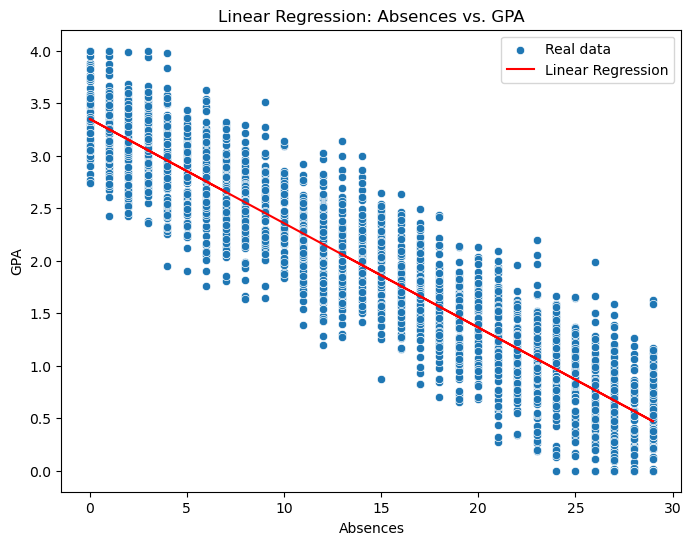

In [267]:

# Create the linear regression model
model = LinearRegression()

# Adjust the model to data
X = df[['Absences']]  # independient variable
y = df['GPA']         # dependient variable

model.fit(X, y)

# Obtain coefficients
b0 = model.intercept_  # Intercept
b1 = model.coef_[0]    # Slope

print(f'Regression ecuation: GPA = {b0:.2f} + {b1:.2f} * Absences')

# Predict
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Coefficient of Determination" (R²): {r2:.2f}')

# Graph the regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Absences'], y=df['GPA'], label='Real data')
plt.plot(df['Absences'], y_pred, color='red', label='Linear Regression')
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.title('Linear Regression: Absences vs. GPA')
plt.legend()
plt.show()

In [268]:
# Export to excel 
with pd.ExcelWriter("Students_modified.xlsx", engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="Students", index=False)
    summary_df.to_excel(writer, sheet_name="Summary", index=False)

print("¡Excel exported!")

¡Excel exported!


In [275]:
# Step 3: Prepare the data (dependent and independent variables)
X = df[['ParentalSupport', 'Absences']]  # Independent variables
y = df['GPA']  # Dependent variable

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict the GPA on the test data
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Model coefficients: {model.coef_}')
print(f'Model intercept: {model.intercept_}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Coefficient of Determination (R²): {r2}')

# Model formula
print("\nThe formula of the model is:")
print("GPA = {:.4f} + {:.4f} * ParentalSupport + {:.4f} * Absences".format(model.intercept_, model.coef_[0], model.coef_[1]))

# 1. Evaluate multicollinearity using VIF
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nEvaluating multicollinearity using VIF:")
print(vif_data)

# 2. Evaluate errors independence using Durbin-Watson
modelo = sm.OLS(df['GPA'], X).fit()
dw_stat = durbin_watson(modelo.resid)
print(f'\nDurbin-Watson statistic: {dw_stat:.4f}')

# 3. Evaluate homoscedasticity using Breusch-Pagan
bp_test = het_breuschpagan(modelo.resid, X)
print(f'\nBreusch-Pagan statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}')


#4. Evaluate errors normaluty using Shapiro
shapiro_test = shapiro(modelo.resid)
print(f'Shapiro-Wilk statistic: {shapiro_test.statistic:.4f}, p-valor: {shapiro_test.pvalue:.4f}')


Model coefficients: [ 0.2798771  -0.09922915  0.0113712 ]
Model intercept: 3.261278784493631
Mean Squared Error (MSE): 0.12018248904399896
Coefficient of Determination (R²): 0.8546647126927414

The formula of the model is:
GPA = 3.2613 + 0.2799 * ParentalSupport + -0.0992 * Absences

Evaluating multicollinearity using VIF:
          Variable       VIF
0            const  5.432252
1  ParentalSupport  1.001221
2         Absences  1.000683
3           Gender  1.001441

Durbin-Watson statistic: 2.0153

Breusch-Pagan statistic: 4.7666, p-value: 0.1897
Shapiro-Wilk statistic: 0.9989, p-valor: 0.1454


In [ ]:

# Ajustar el modelo de regresión
modelo = sm.OLS(df['GPA'], X).fit()

# Calcular el estadístico de Durbin-Watson
dw_stat = durbin_watson(modelo.resid)
print(f'Estadístico de Durbin-Watson: {dw_stat:.4f}')